In [181]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [204]:
df = pd.read_csv('/Users/a1111/Desktop/parsing.csv', sep=',')

## Предобработка

In [205]:
df

,Unnamed: 0,Модель,Цена,Год выпуска,Пробег,Привод,ЛС,Тип двигателя,Тип кузова,Коробка передач,Объем двигателя,Цвет,Запас хода
0,0,Kia Carnival IV,4379000,2020,26000,передний,202,Дизель,минивэн,автомат,2.2,чёрный,NaN
1,1,Kia Carnival III,2519000,2018,43000,передний,202,Дизель,минивэн,автомат,2.2,чёрный,NaN
2,2,Tesla Model X Plaid I Рестайлинг,15490000,2022,70,полный,1020,Электро,внедорожник 5 дв.,NaN,NaN,чёрный,Заряд на 547 км
3,3,LADA (ВАЗ) Vesta I,1330000,2021,9000,передний,113,Бензин,седан,вариатор,1.6,белый,NaN
4,4,McLaren 765LT,59500000,2021,1311,задний,765,Бензин,купе,робот,4.0,фиолетовый,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3697,3697,LADA (ВАЗ) Priora I,200000,2009,203000,передний,98,Бензин,хэтчбек 5 дв.,механика,1.6,чёрный,NaN
3698,3698,Skoda Superb I Рестайлинг,1145000,2008,53000,передний,150,Бензин,седан,автомат,1.8,серый,NaN
3699,3699,Lexus NX 200t I,2758000,2015,93211,полный,238,Бензин,внедорожник 5 дв.,автомат,2.0,красный,NaN
3700,3700,Renault Kangoo I,90000,2001,220000,передний,80,Дизель,компактвэн,механика,1.9,серый,NaN


In [206]:
df.isnull().sum()

Unnamed: 0            0
Модель                0
Цена                  0
Год выпуска           0
Пробег                0
Привод                0
ЛС                    0
Тип двигателя         0
Тип кузова            0
Коробка передач      40
Объем двигателя      40
Цвет                  0
Запас хода         3662
dtype: int64

### Как мы видим, у нас есть пропуски в данных о запасе хода для автомобилей с обычным двигателем, о коробке передач и объёме двигателя для электромобилей. Так как пропусков в запасе хода большая часть от всех данных, мы его удалим. А пропуски по электромобилям в коробке передач и объёме двигателя мы заполним следующими данными: так как коробка передач является категориальным признаком, а в электромобилях её нет, мы заменим пропуски на автомат, так как по технике вождения они ничем не отличаются (а для покупателей это одно и то же), а объём двигателя рассчитаем от количества лошадиных сил, по среднему значению отношения ЛС/объём.

In [207]:
df.drop('Unnamed: 0', axis=1, inplace=True) #удалим ненужный нам столбец с повтором индексов

In [208]:
df.drop('Запас хода', axis=1, inplace=True)

In [209]:
df['Коробка передач'].fillna('автомат', inplace=True)

In [210]:
df['Объем двигателя'].fillna(df['ЛС'] / (df['ЛС'] / df['Объем двигателя']).mean(), inplace=True)

In [211]:
df['Модель'] = df['Модель'].replace('"', '') # кое-где от парсинга в моделях остались лишние кавычки, удаляем их

In [212]:
df['Объем двигателя'] = df['Объем двигателя'].round(1) #округлим полученные значения, чтобы было красиво

In [213]:
pd.DataFrame.drop_duplicates(df, inplace = True) # удаляем повторы
df = df.reset_index(inplace = False)

In [214]:
df.drop('index', axis=1, inplace=True)

In [224]:
df = df.rename(columns={"Объем двигателя": "Объём двигателя"})  # мы любим русский язык

In [225]:
df

,Модель,Цена,Год выпуска,Пробег,Привод,ЛС,Тип двигателя,Тип кузова,Коробка передач,Объём двигателя,Цвет
0,Kia Carnival IV,4379000,2020,26000,передний,202,Дизель,минивэн,автомат,2.2,чёрный
1,Kia Carnival III,2519000,2018,43000,передний,202,Дизель,минивэн,автомат,2.2,чёрный
2,Tesla Model X Plaid I Рестайлинг,15490000,2022,70,полный,1020,Электро,внедорожник 5 дв.,автомат,12.0,чёрный
3,LADA (ВАЗ) Vesta I,1330000,2021,9000,передний,113,Бензин,седан,вариатор,1.6,белый
4,McLaren 765LT,59500000,2021,1311,задний,765,Бензин,купе,робот,4.0,фиолетовый
...,...,...,...,...,...,...,...,...,...,...,...
2553,Hyundai Sonata VIII (DN8),2949000,2020,49538,передний,183,Бензин,седан,автомат,1.6,белый
2554,Kia Rio II Рестайлинг,379000,2009,175645,передний,97,Бензин,хэтчбек 5 дв.,механика,1.4,серый
2555,Toyota Venza I Рестайлинг,1849000,2013,131320,полный,185,Бензин,внедорожник 5 дв.,автомат,2.7,коричневый
2556,Lexus NX 200t I,2758000,2015,93211,полный,238,Бензин,внедорожник 5 дв.,автомат,2.0,красный


In [217]:
df.isnull().sum() 

Модель             0
Цена               0
Год выпуска        0
Пробег             0
Привод             0
ЛС                 0
Тип двигателя      0
Тип кузова         0
Коробка передач    0
Объем двигателя    0
Цвет               0
dtype: int64

In [218]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2558 entries, 0 to 2557
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Модель           2558 non-null   object 
 1   Цена             2558 non-null   int64  
 2   Год выпуска      2558 non-null   int64  
 3   Пробег           2558 non-null   int64  
 4   Привод           2558 non-null   object 
 5   ЛС               2558 non-null   int64  
 6   Тип двигателя    2558 non-null   object 
 7   Тип кузова       2558 non-null   object 
 8   Коробка передач  2558 non-null   object 
 9   Объем двигателя  2558 non-null   float64
 10  Цвет             2558 non-null   object 
dtypes: float64(1), int64(4), object(6)
memory usage: 220.0+ KB


### Кратко опишем данные: пока что у нас 11 признаков, 5 из которых (цена, год выпуска, пробег, ЛС, объем двигателя) являются числовыми, а 6 (модель, привод, тип двигателя, тип кузова, коробка передач, цвет) - категориальными.

### Ура, мы избавились от пропусков и повторов(некоторые страницы запарсились несколько раз), теперь можем переходить к визуализации и дальнейшей обработке данных 

## Посмотрим на корреляцию числовых признаков с ценой

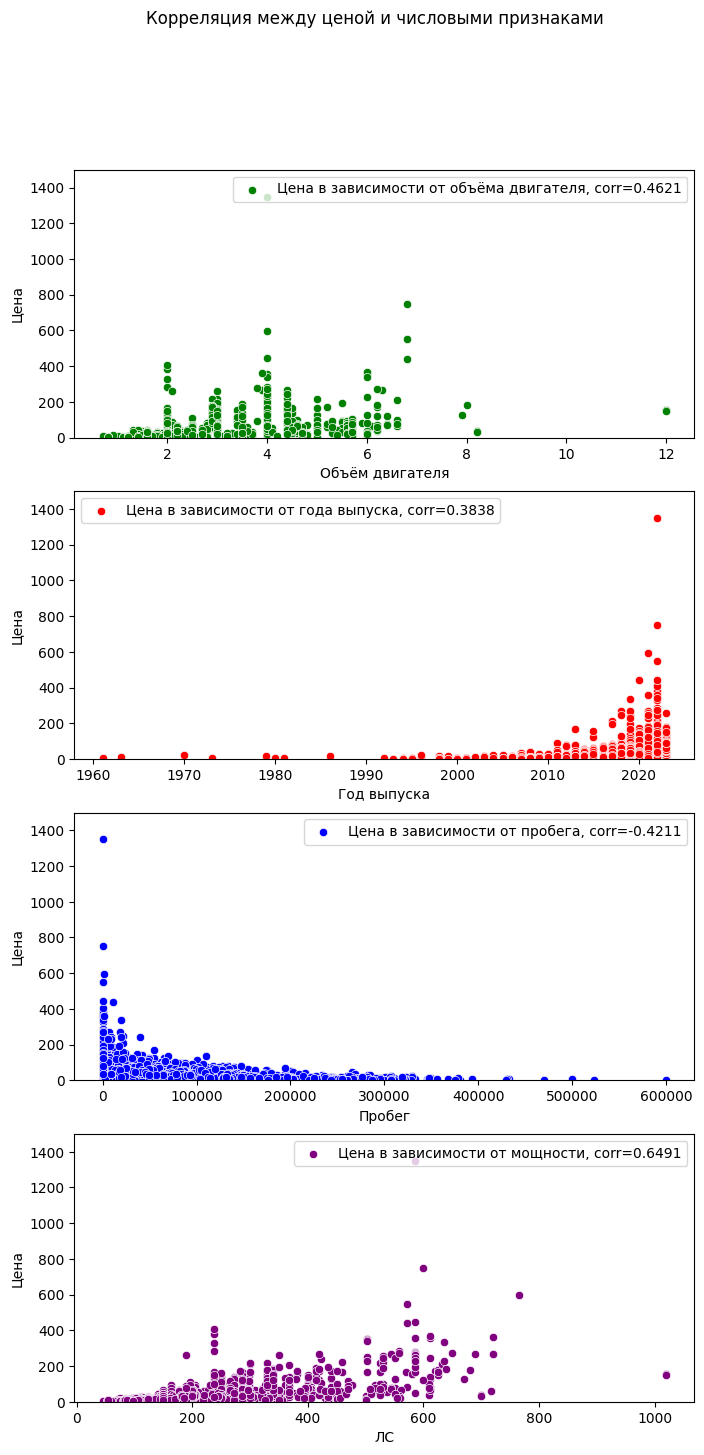

In [227]:
fig = plt.figure(figsize=(8, 16))
fig.suptitle('Корреляция между ценой и числовыми признаками')

plt.subplot(4, 1, 1)
sns.scatterplot( x = df['Объём двигателя'], y = df['Цена']/100000, data = df, label = 'Цена в зависимости от объёма двигателя, corr=' + str('%.4f' % np.corrcoef(df['Объём двигателя'], df['Цена'])[0][1]), color = 'g').set_ylim(0, 1500)

plt.subplot(4, 1, 2)
sns.scatterplot( x = df['Год выпуска'], y = df['Цена']/100000, data = df, label = 'Цена в зависимости от года выпуска, corr=' + str('%.4f' % np.corrcoef(df['Год выпуска'], df['Цена'])[0][1]),  color = 'r').set_ylim(0, 1500)

plt.subplot(4, 1, 3)
sns.scatterplot( x = df['Пробег'], y = df['Цена']/100000, data = df, label = 'Цена в зависимости от пробега, corr=' + str('%.4f' % np.corrcoef( df['Пробег'], df['Цена'])[0][1]), color = 'b').set_ylim(0, 1500)

plt.subplot(4, 1, 4)
sns.scatterplot( x = df['ЛС'], y = df['Цена']/100000, data = df, label = 'Цена в зависимости от мощности, corr=' + str('%.4f' % np.corrcoef(df['ЛС'], df['Цена'])[0][1]), color = 'purple').set_ylim(0, 1500)

#fig.legend(loc='lower right')
plt.show();

### Мы можем видеть по графикам, что цена больше всего зависит от года выпуска и мощности автомобиля, обратно зависит от пробега и напрямую не зависит от объема двигателя. Также у нас есть выброс, машина по цене 135 млн. руб., но к обработке данных мы приступим позже

### Давайте визуализируем самые популярные цвета

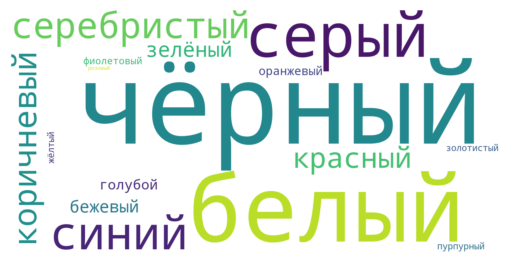

In [189]:
from wordcloud import WordCloud
df_string = df['Цвет'].to_string()
wordcloud = WordCloud(width=1600, height=800, background_color='white').generate(df_string)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off");

## Построим распределение числовых признаков

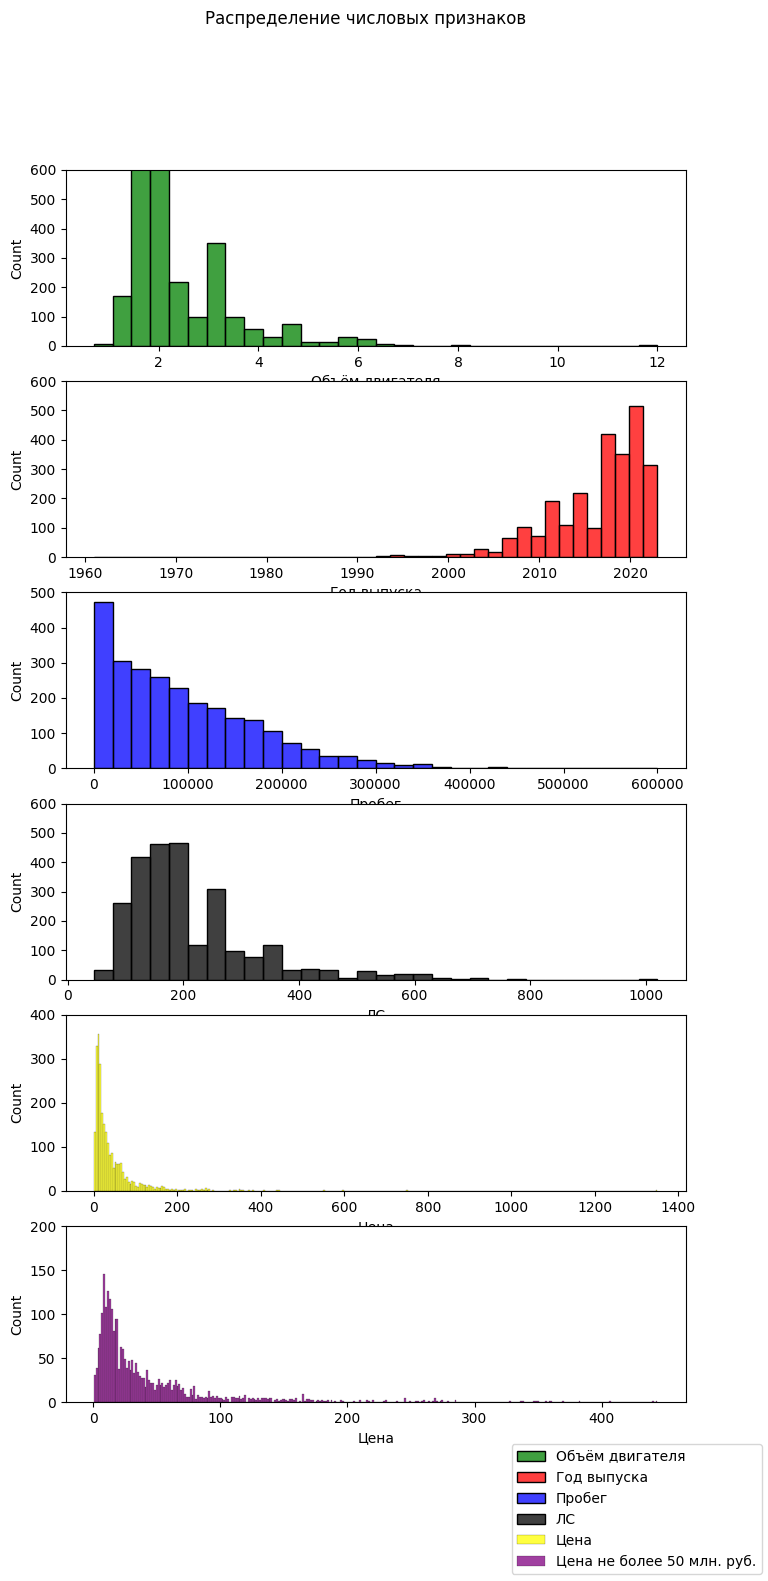

In [228]:
fig = plt.figure(figsize=(8, 16))
fig.suptitle('Распределение числовых признаков')

plt.subplot(6, 1, 1)
sns.histplot(df['Объём двигателя'], label = 'Объём двигателя', bins = 30, color = 'g').set_ylim(0, 600)

plt.subplot(6, 1, 2)
sns.histplot(df['Год выпуска'],label = 'Год выпуска', bins = 40, color = 'r').set_ylim(0, 600)

plt.subplot(6, 1, 3)
sns.histplot(df['Пробег'], label = 'Пробег', bins = 30, color = 'b').set_ylim(0, 500)

plt.subplot(6, 1, 4)
sns.histplot(df['ЛС'], label = 'ЛС', bins = 30, color = 'black').set_ylim(0, 600)

plt.subplot(6, 1, 5)
sns.histplot(df['Цена']/100000, label = 'Цена', bins = 300, color = 'yellow').set_ylim(0, 400)

plt.subplot(6, 1, 6)
sns.histplot(df[df['Цена'] <= 50000000]['Цена']/100000, label = 'Цена не более 50 млн. руб.', bins = 300, color = 'purple').set_ylim(0, 200)


fig.legend(loc='lower right');

### Ни одно из распределений не похоже на нормальное, почти везде есть 'тяжелые 'хвосты

## Добавим новые переменные

### Выделим марку машины - так это может быть важной категориальной переменной (более/менее премиально, также лучшее/худшее отношение к марке)

In [229]:
df['Марка'] = df['Модель'].str.split(' ').str[0]
df['Марка'][np.where(df['Марка'] == 'Land')[0]] = 'Land Rover'

In [230]:
df['Марка'].value_counts()

Mercedes-Benz    265
Kia              249
BMW              221
Hyundai          202
Toyota           178
Volkswagen       175
Skoda            137
Nissan           103
Audi              90
Lexus             87
LADA              80
Renault           76
Ford              74
Land Rover        70
Porsche           60
Opel              49
Chevrolet         46
Mitsubishi        41
Volvo             40
Mazda             40
Jeep              19
Infiniti          19
Haval             17
Geely             17
Peugeot           16
Honda             14
Tesla             14
Subaru            12
Genesis            9
SsangYong          9
Dodge              9
Citroen            9
Bentley            9
Suzuki             9
Jaguar             8
УАЗ                8
Chery              8
Cadillac           8
EXEED              8
Daewoo             6
ГАЗ                5
RAM                5
Rolls-Royce        4
Changan            4
MINI               4
Smart              4
Ferrari            4
Fiat         

### Относительно важный критерий при выборе машины - сумма транспортного налога, который за неё придётся платить. Соответсвтенно, данная цифра учитвается в спросе, и таким образом влияет на цену.
### Налог рассчитывается с расчётом, что покупатель проездит на машине год; учитываюся ставки для Москвы, рассчитывается по формуле с сайта ФНС

In [232]:
na = pd.DataFrame() # создаём отдельный датафрейм для всех показателей, связанных с расчётом налога и соответствием разлиным границам
na['coef11'] = (df['Цена']>3000000)
na['coef12'] = (df['Цена']<=5000000)
na['coef13'] = (2023-df['Год выпуска'])<=3
na['coef21'] = (df['Цена']>5000000)
na['coef22'] = (df['Цена']<=10000000)
na['coef23'] = (2023-df['Год выпуска'])<=5
na['coef31'] = (df['Цена']>10000000)
na['coef32'] = (df['Цена']<=15000000)
na['coef33'] = (2023-df['Год выпуска'])<=10
na['coef41'] = (df['Цена']>15000000)
na['coef42'] = (2023-df['Год выпуска'])<=10
na.insert(11, 'coef',1)
# коэффицент домножения для дорогих машин
na['coef'][np.where((na[['coef11','coef12','coef13']]).all(axis = 1) == True)[0]] = 1.1
na['coef'][np.where((na[['coef21','coef22','coef23']]).all(axis = 1) == True)[0]] = 2
na['coef'][np.where((na[['coef31','coef32','coef33']]).all(axis = 1) == True)[0]] = 3
na['coef'][np.where((na[['coef41','coef42']]).all(axis = 1) == True)[0]] = 3
na.insert(12, 'sil',1)
# ЛС умножаются на кол-во рублей за одну ЛС (зависит от ЛС)
na['sil'][np.where((df['ЛС'] < 100).values  == True)[0]] = 12
na['sil'][np.where((pd.DataFrame({'1': df['ЛС'] >= 100,'2': df['ЛС'] < 125})).all(axis=1)  == True)[0]] = 25
na['sil'][np.where((pd.DataFrame({'1': df['ЛС'] >= 125,'2': df['ЛС'] < 150})).all(axis=1)  == True)[0]] = 35
na['sil'][np.where((pd.DataFrame({'1': df['ЛС'] >= 150,'2': df['ЛС'] < 175})).all(axis=1)  == True)[0]] = 45
na['sil'][np.where((pd.DataFrame({'1': df['ЛС'] >= 175,'2': df['ЛС'] < 200})).all(axis=1)  == True)[0]] = 50
na['sil'][np.where((pd.DataFrame({'1': df['ЛС'] >= 200,'2': df['ЛС'] < 225})).all(axis=1)  == True)[0]] = 65
na['sil'][np.where((pd.DataFrame({'1': df['ЛС'] >= 225,'2': df['ЛС'] < 250})).all(axis=1)  == True)[0]] = 75
na['sil'][np.where((df['ЛС'] >= 250).values  == True)[0]] = 150
df['Налог'] = df['ЛС']* na['coef'] * na['sil'] * 1 # непосредсвтенно налог
df['Налог'][np.where(df['Тип двигателя'] == 'Электро')[0]] = 0 # для электрокаров налога нет
df['Налог'] = df['Налог'].astype(int)

### Разделение машин на "классы" по цене - условно есть "эконом" - 1, "комфорт" - 2, "бизнес" - 3, "ультима" - 4 и "ультима+" - 5.

In [233]:
df.insert(12, 'Класс',1)
q=(df['Цена'].quantile([0.2, 0.4, 0.6, 0.8])).values # делим все цены на 5 частей равного размера
df['Класс'][np.where((df['Цена'] < q[0]).values  == True)[0]] = 1
df['Класс'][np.where((pd.DataFrame({'1': df['Цена'] >= q[0],'2': df['Цена'] < q[1]})).all(axis=1)  == True)[0]] = 2
df['Класс'][np.where((pd.DataFrame({'1': df['Цена'] >= q[1],'2': df['Цена'] < q[2]})).all(axis=1)  == True)[0]] = 3
df['Класс'][np.where((pd.DataFrame({'1': df['Цена'] >= q[2],'2': df['Цена'] < q[3]})).all(axis=1)  == True)[0]] = 4
df['Класс'][np.where((df['Цена'] > q[3]).values  == True)[0]] = 5

In [234]:
df

,Модель,Цена,Год выпуска,Пробег,Привод,ЛС,Тип двигателя,Тип кузова,Коробка передач,Объём двигателя,Цвет,Марка,Класс,Налог
0,Kia Carnival IV,4379000,2020,26000,передний,202,Дизель,минивэн,автомат,2.2,чёрный,Kia,4,14443
1,Kia Carnival III,2519000,2018,43000,передний,202,Дизель,минивэн,автомат,2.2,чёрный,Kia,3,13130
2,Tesla Model X Plaid I Рестайлинг,15490000,2022,70,полный,1020,Электро,внедорожник 5 дв.,автомат,12.0,чёрный,Tesla,5,0
3,LADA (ВАЗ) Vesta I,1330000,2021,9000,передний,113,Бензин,седан,вариатор,1.6,белый,LADA,2,2825
4,McLaren 765LT,59500000,2021,1311,задний,765,Бензин,купе,робот,4.0,фиолетовый,McLaren,5,344250
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2553,Hyundai Sonata VIII (DN8),2949000,2020,49538,передний,183,Бензин,седан,автомат,1.6,белый,Hyundai,3,9150
2554,Kia Rio II Рестайлинг,379000,2009,175645,передний,97,Бензин,хэтчбек 5 дв.,механика,1.4,серый,Kia,1,1164
2555,Toyota Venza I Рестайлинг,1849000,2013,131320,полный,185,Бензин,внедорожник 5 дв.,автомат,2.7,коричневый,Toyota,3,9250
2556,Lexus NX 200t I,2758000,2015,93211,полный,238,Бензин,внедорожник 5 дв.,автомат,2.0,красный,Lexus,3,17850


In [235]:
df.to_csv('/Users/a1111/Desktop/proeda.csv', header=True,index = True, sep=',')